# Introduction à Pandas : exercices


## Données d'exemple : Geonames

file: allCountries.zip source: http://download.geonames.org/export/

### Documentation

The main 'geoname' table has the following fields :

* geonameid : integer id of record in geonames database
* name : name of geographical point (utf8) varchar(200)
* asciiname : name of geographical point in plain ascii characters, varchar(200)
* alternatenames : alternatenames, comma separated, ascii names automatically transliterated, convenience attribute from alternatename table, varchar(10000)
* latitude : latitude in decimal degrees (wgs84)
* longitude : longitude in decimal degrees (wgs84)
* feature class : see http://www.geonames.org/export/codes.html, char(1)
* feature code : see http://www.geonames.org/export/codes.html, varchar(10)
* country code : ISO-3166 2-letter country code, 2 characters
* cc2 : alternate country codes, comma separated, ISO-3166 2-letter country code, 200 characters
* admin1 code : fipscode (subject to change to iso code), see exceptions below, see file admin1Codes.txt for display names of this code; varchar(20)
* admin2 code : code for the second administrative division, a county in the US, see file admin2Codes.txt; varchar(80)
* admin3 code : code for third level administrative division, varchar(20)
* admin4 code : code for fourth level administrative division, varchar(20)
* population : bigint (8 byte int)
* elevation : in meters, integer
* dem : digital elevation model, srtm3 or gtopo30, average elevation of 3''x3'' (ca 90mx90m) or 30''x30'' (ca 900mx900m) area in meters, integer. srtm processed by cgiar/ciat.
* timezone : the iana timezone id (see file timeZone.txt) varchar(40)
* modification date : date of last modification in yyyy-MM-dd format

AdminCodes: Most adm1 are FIPS codes. ISO codes are used for US, CH, BE and ME. UK and Greece are using an additional level between country and fips code. The code '00' stands for general features where no specific adm1 code is defined. The corresponding admin feature is found with the same countrycode and adminX codes and the respective feature code ADMx.

In [1]:
import pandas as pd

df = pd.read_csv('shared_data/geonames/allCountries.zip', header=None, delimiter='\t', names=('geonameid', 'name', 'asciiname', 'alternatenames', 'latitude', 'longitude', 'feature class',
                     'feature code', 'country code', 'cc2', 'admin1_code', 'admin2_code', 'admin3_code', 'admin4_code',
                     'population', 'elevation', 'dem', 'timezone', 'modification_date'), usecols=('geonameid', 'name', 'latitude', 'longitude', 'feature class',
                     'feature code', 'country code', 'admin1_code', 'admin2_code', 'admin3_code', 'admin4_code',
                     'population', 'elevation', 'modification_date'))
df.sample(100)

C:\Users\iriarte\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (8,10,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,geonameid,name,latitude,longitude,feature class,feature code,country code,admin1_code,admin2_code,admin3_code,admin4_code,population,elevation,modification_date
8296827,6924192,Zabolotnyy,63.57235,53.63287,P,PPL,RU,34,NaN,NaN,NaN,0,NaN,2012-01-20
652699,2801697,Ruisseau de Boeur,50.11667,5.85000,H,STM,BE,WAL,WLX,NaN,NaN,0,NaN,2010-03-06
1559582,2001882,Zhaocun,34.53832,109.45965,P,PPL,CN,26,NaN,NaN,NaN,0,NaN,2012-01-20
3953183,10212617,Tirmau,21.92278,78.21223,P,PPL,IN,35,447,NaN,NaN,0,NaN,2016-02-11
11800894,1002729,Ga-Titi,-25.30000,25.83333,P,PPL,ZA,10,DC38,NW385,NaN,0,NaN,2012-07-12
10463061,5275995,Towne Country Club,42.83751,-89.06178,S,RSRT,US,WI,105,22575,NaN,0,254.0,2017-05-23
6299656,11437111,Arroyo Jomulco,24.66257,-106.48585,H,STMI,MX,10,NaN,NaN,NaN,0,NaN,2017-02-05
406222,8348232,Brahma Lodge,-34.77604,138.65306,P,PPLX,AU,5,47140,NaN,NaN,0,NaN,2012-07-13
10210756,5022522,County Ditch Number Four,48.60636,-96.34614,H,CNL,US,MN,135,NaN,NaN,0,327.0,2006-01-15
9648286,4449136,Underwood Branch,31.31712,-89.01089,H,STM,US,MS,111,NaN,NaN,0,30.0,2006-01-15


### Question 1

Quel est la taille du DataFrame?


In [2]:
df.shape

(11897027, 14)

### Question 2

Afficher le résumé des veleurs du DataFrame


In [3]:
df.describe()

,geonameid,latitude,longitude,population,elevation
count,1.189703e+07,1.189703e+07,1.189703e+07,1.189703e+07,2.359496e+06
mean,6.023458e+06,2.829223e+01,1.212834e+01,4.314231e+03,5.618345e+02
std,3.478550e+06,2.368156e+01,8.040919e+01,2.650591e+06,7.287861e+02
min,3.000000e+00,-9.000000e+01,-1.799995e+02,-1.200000e+01,-1.091100e+04
25%,3.011316e+06,1.671923e+01,-7.455850e+01,0.000000e+00,1.090000e+02
50%,6.005998e+06,3.325595e+01,1.683333e+01,0.000000e+00,2.630000e+02
75%,9.037462e+06,4.380352e+01,8.068333e+01,0.000000e+00,6.790000e+02
max,1.203626e+07,9.000000e+01,1.800000e+02,6.814400e+09,8.848000e+03


### Question 3

Quels sont les lacs qui figurent dans les données? (*aide : code "LK"*)

*Bonus : Y a-t-il des doublons ? *

In [4]:
lacs = df.loc[df['feature code'] == 'LK']
lacs[['geonameid', 'name', 'country code']].sort_values(by='name')

,geonameid,name,country code
10204146,5015768,'R' Lake (historical),US
6637930,9039959,1.Porsvatn,NO
11001377,5816742,1000 Island Lake,US
892973,5881640,101 Mile Lake,CA
892975,5881642,103 Mile Lake,CA
892977,5881644,105 Mile Lake,CA
892980,5881647,108 Mile Lake,CA
892993,5881660,130 Mile Lake,CA
892999,5881666,16 1/2 Mile Lake,CA
893001,5881668,180 Lake,CA


In [5]:
# compraraison avec le nombre de IDs uniques
lacs_ids = lacs['geonameid'].nunique()
if lacs.shape[0] == lacs_ids :
    print ('Il n\'y a pas de douoblons')
else :
    print ('Il n\'y a pas de douoblons')
print ('nombre de ids : ' + str(lacs_ids))
        

Il n'y a pas de douoblons
nombre de ids : 267248


### Question 4

Afficher le nombre de lacs par pays

In [6]:
lacs_par_pays = lacs['country code'].value_counts()
lacs_par_pays

CA    104664
US     69290
RU     16225
NO     12461
SE     10865
FI      4957
MZ      4033
AU      3802
PE      3480
DE      2525
LT      2360
KZ      1800
BR      1590
IE      1552
ID      1537
MX      1261
AR      1220
CO      1209
CN      1165
NZ      1157
CH      1140
PL      1063
VE      1013
IN       979
GB       819
BY       763
IS       607
CL       597
LV       570
BO       558
       ...  
YT         3
LB         3
CK         3
TT         2
FM         2
JM         2
WF         2
GU         2
SR         2
LI         2
BN         2
GQ         2
DM         2
SG         2
KI         2
VC         1
NR         1
YE         1
KN         1
CW         1
CY         1
DJ         1
GF         1
LS         1
MV         1
BW         1
HK         1
JO         1
GW         1
JE         1
Name: country code, Length: 202, dtype: int64

### Question 5

Quels sont les lacs repertoriés pour la Suisse et quel est son altitude moyenne ?

*Bonus : Et pour le Canton de Genève ?*

In [7]:
lacs_ch = lacs.loc[lacs['country code'] == 'CH']
lacs_ch.sort_values(by='name')

,geonameid,name,latitude,longitude,feature class,feature code,country code,admin1_code,admin2_code,admin3_code,admin4_code,population,elevation,modification_date
1352440,11396381,Aatalweier,47.23978,8.95145,H,LK,CH,SG,1726,3342,NaN,0,NaN,2016-12-27
1352307,11396247,Acqua Fredda,46.42735,8.54427,H,LK,CH,TI,2108,5310,NaN,0,NaN,2016-12-27
1353177,11397122,Adligeweier,47.09082,8.28545,H,LK,CH,LU,313,1024,NaN,0,NaN,2016-12-27
1353109,11397054,Albulasee,46.58389,9.84796,H,LK,CH,GR,1846,3785,NaN,0,NaN,2017-07-28
1353186,11397131,Allmendweiher,47.30588,7.84221,H,LK,CH,SO,1108,2578,NaN,0,NaN,2016-12-27
1353289,11397234,Allmendweiher,47.30547,7.84349,H,LK,CH,SO,1108,2578,NaN,0,NaN,2016-12-27
1353249,11397194,Alpler See,46.93539,8.65419,H,LK,CH,UR,400,1217,NaN,0,NaN,2016-12-27
1352569,11396511,Alpler See,46.90045,8.79126,H,LK,CH,UR,400,1219,NaN,0,NaN,2016-12-27
1353045,11396990,Alte Rhein Au,47.40162,9.65605,H,LK,CH,SG,1723,3234,NaN,0,NaN,2016-12-27
1352427,11396368,Alte Zihl,47.13747,7.33330,H,LK,CH,BE,242,746,NaN,0,NaN,2016-12-27


In [8]:
lacs_ch['elevation'].mean()

642.9

In [9]:
lacs['elevation'].mean()

643.063465894429

In [10]:
lacs_ch.loc[lacs_ch['admin1_code'] == 'GE']

,geonameid,name,latitude,longitude,feature class,feature code,country code,admin1_code,admin2_code,admin3_code,admin4_code,population,elevation,modification_date
1352314,11396254,Etang du Moulin de Vert,46.18096,6.02112,H,LK,CH,GE,2500,6609,NaN,0,NaN,2016-12-27
1352317,11396257,Etang du Moulin de Vert,46.18023,6.02105,H,LK,CH,GE,2500,6609,NaN,0,NaN,2016-12-27
1352982,11396926,Barrage du Rhône,46.19614,6.04785,H,LK,CH,GE,2500,6638,NaN,0,NaN,2016-12-27


In [11]:
lacs_ch.loc[lacs_ch['admin1_code'] == 'GE']['elevation'].mean()

nan

### Question 6

Identifier le lac Léman

In [12]:
lacs[lacs['name'].str.contains('Geneva')].sort_values(by='name')

,geonameid,name,latitude,longitude,feature class,feature code,country code,admin1_code,admin2_code,admin3_code,admin4_code,population,elevation,modification_date
971446,5960266,Geneva Lake,46.76451,-81.54622,H,LK,CA,8,3552,NaN,NaN,0,NaN,2018-01-20
10609431,5422870,Geneva Lake,39.57063,-105.82117,H,LK,US,CO,19,NaN,NaN,0,3537.0,2011-12-11
10609424,5422863,Geneva Lake,39.09698,-107.07756,H,LK,US,CO,51,NaN,NaN,0,3335.0,2011-12-11
10182235,4993798,Geneva Lake,42.64384,-83.36583,H,LK,US,MI,125,NaN,NaN,0,284.0,2011-12-11
10182234,4993797,Geneva Lake,42.61755,-85.63163,H,LK,US,MI,5,NaN,NaN,0,248.0,2011-12-11
971447,5960267,Geneva Lake,53.49639,-111.18333,H,LK,CA,1,NaN,NaN,NaN,0,NaN,2013-07-21
9356999,4156662,Lake Geneva,28.50295,-82.18297,H,LK,US,FL,53,NaN,NaN,0,17.0,2014-10-07
10874473,5689265,Lake Geneva,46.84090,-100.02012,H,LK,US,ND,43,NaN,NaN,0,550.0,2014-10-08
10839432,5653983,Lake Geneva,48.98167,-115.41216,H,LK,US,MT,53,NaN,NaN,0,1995.0,2014-10-07
10839431,5653982,Lake Geneva,45.25162,-113.65567,H,LK,US,MT,1,NaN,NaN,0,2577.0,2011-12-11


In [13]:
lacs[(lacs['name'].str.contains('Geneva')) & (lacs['country code'] == 'CH')].sort_values(by='name')

,geonameid,name,latitude,longitude,feature class,feature code,country code,admin1_code,admin2_code,admin3_code,admin4_code,population,elevation,modification_date
1300346,2660647,Lake Geneva,46.43774,6.46906,H,LK,CH,00,NaN,NaN,NaN,0,372.0,2011-02-23


In [14]:
lacs[lacs['geonameid'] == 2660647]

,geonameid,name,latitude,longitude,feature class,feature code,country code,admin1_code,admin2_code,admin3_code,admin4_code,population,elevation,modification_date
1300346,2660647,Lake Geneva,46.43774,6.46906,H,LK,CH,00,NaN,NaN,NaN,0,372.0,2011-02-23


### Question 7

Exporter la table des lacs dans un fichier CSV

In [15]:
lacs.to_csv('lacs.tsv', sep='\t', encoding='utf-8', index=False)

### Question 8

Afficher un graphique des barres avec le nombre de lacs par pays pour les premiers 30 pays

*Bonus : Afficher un histogramme avec l'altitude des lacs et la même chose pour les lacs de Suisse*

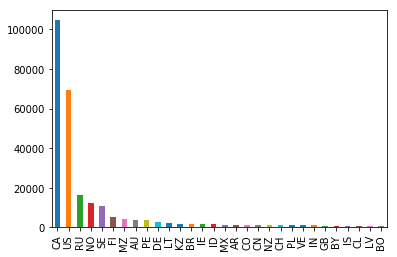

In [16]:
import matplotlib as plt  
%matplotlib inline

lacs_par_pays[0:30].plot.bar()

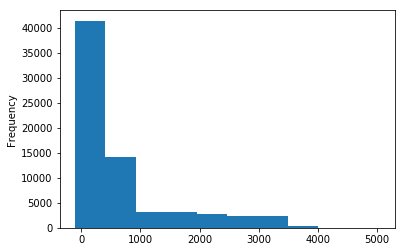

In [17]:
lacs['elevation'].plot.hist()

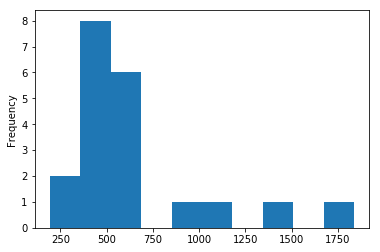

In [18]:
# idem pour la Suisse
lacs_ch['elevation'].plot.hist()